# Data Preparation - LMA Features Data

### Note: Datasets follow the format preprocess_datasetname
So we have, for example: Fs_B_dataset1.csv -> Dataset was first Feature Selected and then Balanced

Fs - Feature Selected

B - Balanced

N - Normalized

S - Standardized

## Imports

In [60]:
import ast
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTENC, SMOTE
from imblearn.under_sampling import NearMiss
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
import joblib
from collections import Counter
import numpy as np

### Load Dataset

In [61]:
data = pd.read_csv('datasets/BANDAI_5frame.csv')

In [62]:
data.head()

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,r_foot_speed,neck_speed,l_hand_acceleration_magnitude,r_hand_acceleration_magnitude,l_foot_acceleration_magnitude,r_foot_acceleration_magnitude,neck_acceleration_magnitude,EMOTION_P,EMOTION_A,EMOTION_D
0,0.433596,0.130036,0.335475,0.538619,0.184473,0.310089,0.210679,0.093915,0.236151,0.223894,...,-0.137483,-0.139467,0.092920,0.196129,0.221155,0.137483,0.139467,0.05,-0.05,0.0
1,0.348051,0.145184,0.256784,0.455501,0.197954,0.284215,0.172405,0.104876,0.236151,0.223894,...,-0.072441,-0.095084,0.048935,0.032804,0.070625,0.072096,0.045111,0.05,-0.05,0.0
2,0.320294,0.206306,0.180224,0.380190,0.234406,0.259905,0.133006,0.127385,0.236151,0.223894,...,-0.039016,-0.093423,0.030819,0.043059,0.028182,0.036532,0.014232,0.05,-0.05,0.0
3,0.400389,0.287300,0.136974,0.319861,0.279208,0.239450,0.112632,0.156856,0.236151,0.223894,...,-0.036825,-0.101489,0.044534,0.054382,0.015679,0.012813,0.021506,0.05,-0.05,0.0
4,0.465923,0.356129,0.136171,0.309995,0.313229,0.224432,0.112950,0.186680,0.236151,0.223894,...,-0.054338,-0.117573,0.044670,0.036618,0.020074,0.022012,0.024961,0.05,-0.05,0.0


## Feature Selection

In [63]:
data = pd.read_csv('datasets/BANDAI_5frame.csv')

In [64]:
y = pd.concat([data.pop(x) for x in ['EMOTION_P', 'EMOTION_A', 'EMOTION_D']], axis=1)
X = data

data.head()

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,l_hand_speed,r_hand_speed,l_foot_speed,r_foot_speed,neck_speed,l_hand_acceleration_magnitude,r_hand_acceleration_magnitude,l_foot_acceleration_magnitude,r_foot_acceleration_magnitude,neck_acceleration_magnitude
0,0.433596,0.130036,0.335475,0.538619,0.184473,0.310089,0.210679,0.093915,0.236151,0.223894,...,-0.092920,-0.196129,-0.221155,-0.137483,-0.139467,0.092920,0.196129,0.221155,0.137483,0.139467
1,0.348051,0.145184,0.256784,0.455501,0.197954,0.284215,0.172405,0.104876,0.236151,0.223894,...,-0.048761,-0.165199,-0.153981,-0.072441,-0.095084,0.048935,0.032804,0.070625,0.072096,0.045111
2,0.320294,0.206306,0.180224,0.380190,0.234406,0.259905,0.133006,0.127385,0.236151,0.223894,...,-0.046947,-0.162465,-0.134006,-0.039016,-0.093423,0.030819,0.043059,0.028182,0.036532,0.014232
3,0.400389,0.287300,0.136974,0.319861,0.279208,0.239450,0.112632,0.156856,0.236151,0.223894,...,-0.080247,-0.151546,-0.128707,-0.036825,-0.101489,0.044534,0.054382,0.015679,0.012813,0.021506
4,0.465923,0.356129,0.136171,0.309995,0.313229,0.224432,0.112950,0.186680,0.236151,0.223894,...,-0.119633,-0.150856,-0.142704,-0.054338,-0.117573,0.044670,0.036618,0.020074,0.022012,0.024961


### Variance Analysis

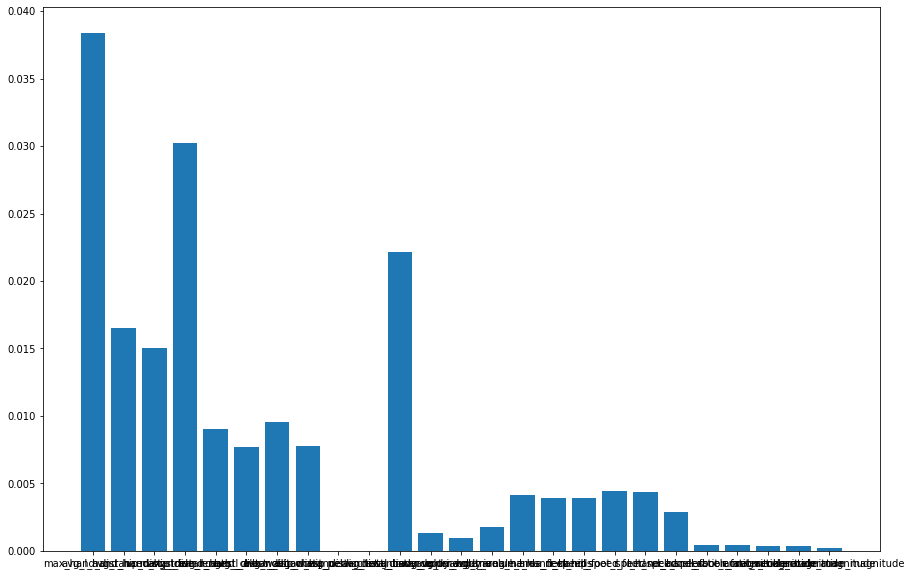

max_hand_distance  -  0.038362575527205574
avg_l_hand_hip_distance  -  0.016484468656518998
avg_r_hand_hip_distance  -  0.015065966758689042
max_stride_length  -  0.030201084814121367
avg_l_hand_chest_distance  -  0.00899875642858216
avg_r_hand_chest_distance  -  0.0076767444412771295
avg_l_elbow_hip_distance  -  0.009538984590500841
avg_r_elbow_hip_distance  -  0.007744355313131842
avg_chest_pelvis_distance  -  1.1936837414096779e-15
avg_neck_chest_distance  -  1.644723481244834e-15
avg_total_body_volume  -  0.022166903533682315
avg_lower_body_volume  -  0.0013621885800554673
avg_upper_body_volume  -  0.000965779663044737
avg_triangle_area_hands_neck  -  0.0018044017404372857
avg_triangle_area_feet_hips  -  0.00414237600901226
l_hand_speed  -  0.0038830161603672507
r_hand_speed  -  0.003929295443277392
l_foot_speed  -  0.004465797744870102
r_foot_speed  -  0.00440000622622654
neck_speed  -  0.002888032681131847
l_hand_acceleration_magnitude  -  0.0004347576093920629
r_hand_acceleratio

In [65]:
x_fs = []
y_fs = []
for i in data.columns:
    x_fs.append(data[i].var())
    y_fs.append(i)


fig, ax = plt.subplots(figsize=(15,10))

ax.bar(y_fs, x_fs)

plt.show()

for i in data.columns:
    print(i, " - ", data[i].var())

### Remove highly correlated features

In [66]:
data = pd.read_csv('datasets/BANDAI_5frame.csv')

In [67]:
y = pd.concat([data.pop(x) for x in ['EMOTION_P', 'EMOTION_A', 'EMOTION_D']], axis=1)
X = data

data.head()

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,l_hand_speed,r_hand_speed,l_foot_speed,r_foot_speed,neck_speed,l_hand_acceleration_magnitude,r_hand_acceleration_magnitude,l_foot_acceleration_magnitude,r_foot_acceleration_magnitude,neck_acceleration_magnitude
0,0.433596,0.130036,0.335475,0.538619,0.184473,0.310089,0.210679,0.093915,0.236151,0.223894,...,-0.092920,-0.196129,-0.221155,-0.137483,-0.139467,0.092920,0.196129,0.221155,0.137483,0.139467
1,0.348051,0.145184,0.256784,0.455501,0.197954,0.284215,0.172405,0.104876,0.236151,0.223894,...,-0.048761,-0.165199,-0.153981,-0.072441,-0.095084,0.048935,0.032804,0.070625,0.072096,0.045111
2,0.320294,0.206306,0.180224,0.380190,0.234406,0.259905,0.133006,0.127385,0.236151,0.223894,...,-0.046947,-0.162465,-0.134006,-0.039016,-0.093423,0.030819,0.043059,0.028182,0.036532,0.014232
3,0.400389,0.287300,0.136974,0.319861,0.279208,0.239450,0.112632,0.156856,0.236151,0.223894,...,-0.080247,-0.151546,-0.128707,-0.036825,-0.101489,0.044534,0.054382,0.015679,0.012813,0.021506
4,0.465923,0.356129,0.136171,0.309995,0.313229,0.224432,0.112950,0.186680,0.236151,0.223894,...,-0.119633,-0.150856,-0.142704,-0.054338,-0.117573,0.044670,0.036618,0.020074,0.022012,0.024961


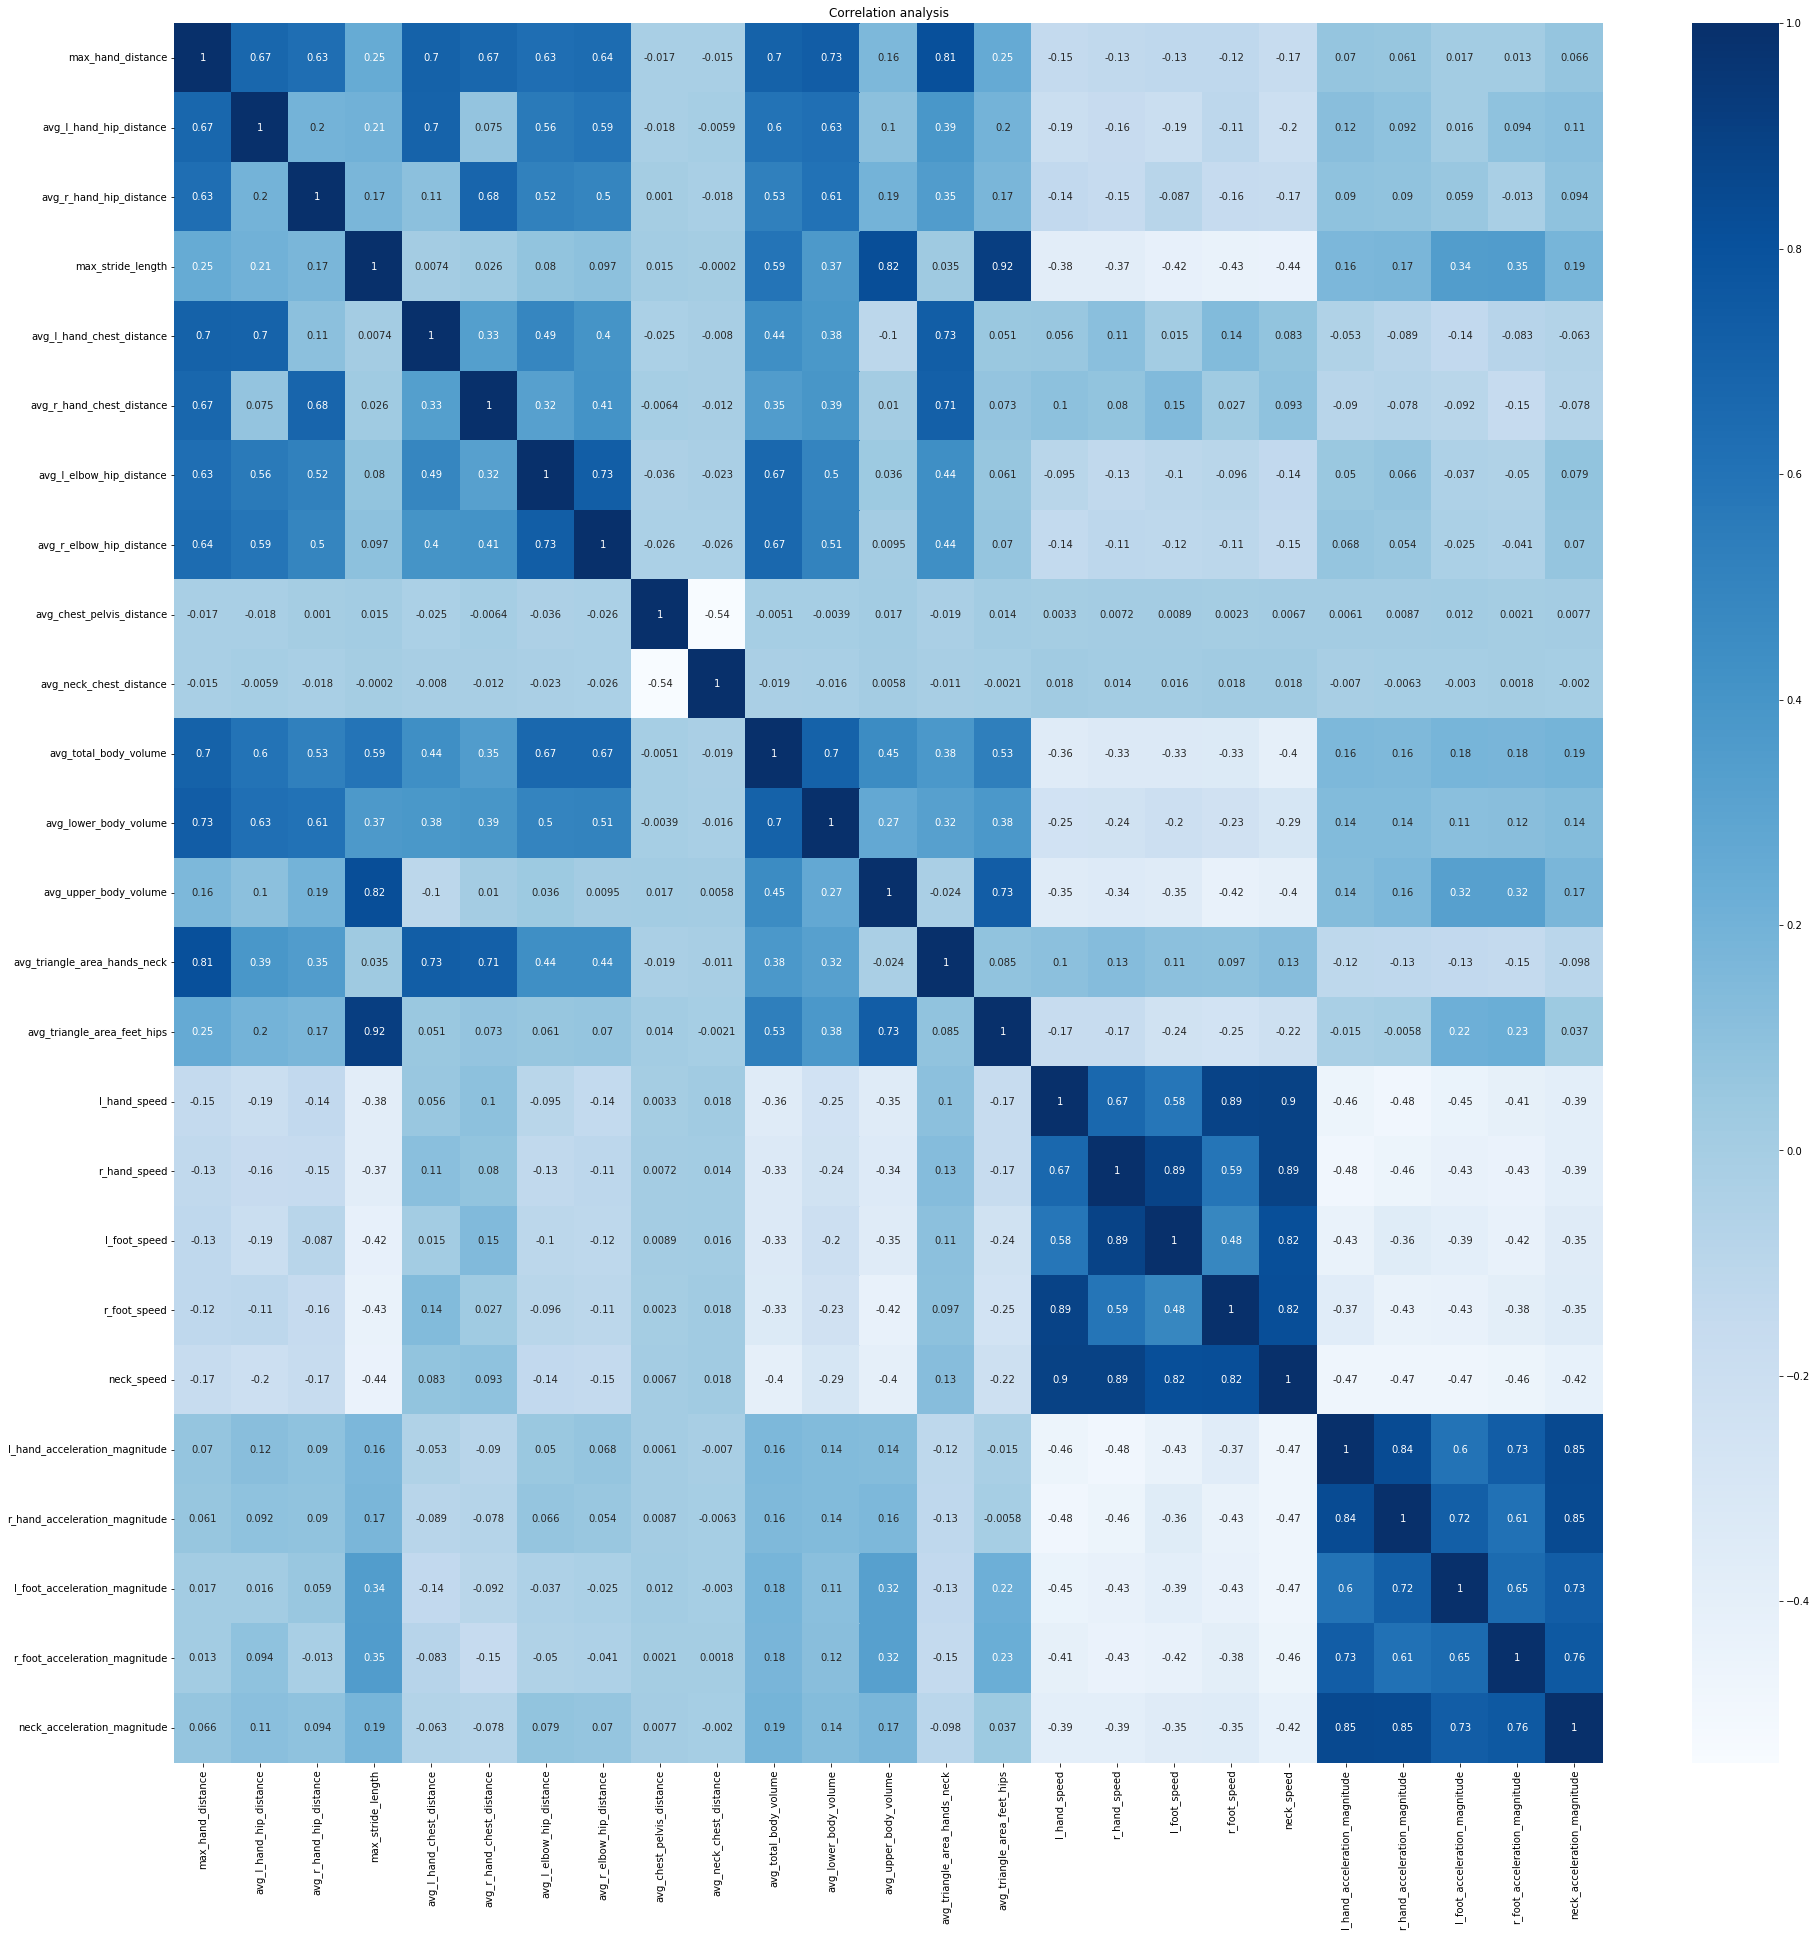

In [68]:
fig = plt.figure(figsize=[32,32])
corr_mtx = data.corr()
sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues')
plt.title('Correlation analysis')
plt.show()

In [69]:
cor_matrix = data.corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)

[]


In [70]:
df = pd.read_csv('datasets/BANDAI_5frame.csv')

cor = df.corr()

#Correlation with output variable
cor_target = abs(cor["EMOTION_P"])
print("===CORRELATION BETWEEN VAR AND PLEASURE COORDINATE===")
print(cor_target)

cor_target = abs(cor["EMOTION_A"])
print("\n===CORRELATION BETWEEN VAR AND AROUSAL COORDINATE===")
print(cor_target)

cor_target = abs(cor["EMOTION_D"])
print("\n===CORRELATION BETWEEN VAR AND DOMINANCE COORDINATE===")
print(cor_target)

===CORRELATION BETWEEN VAR AND PLEASURE COORDINATE===
max_hand_distance                0.311315
avg_l_hand_hip_distance          0.156390
avg_r_hand_hip_distance          0.113808
max_stride_length                0.232206
avg_l_hand_chest_distance        0.189786
avg_r_hand_chest_distance        0.185067
avg_l_elbow_hip_distance         0.001353
avg_r_elbow_hip_distance         0.009074
avg_chest_pelvis_distance        0.019779
avg_neck_chest_distance          0.000548
avg_total_body_volume            0.255931
avg_lower_body_volume            0.336550
avg_upper_body_volume            0.185198
avg_triangle_area_hands_neck     0.203759
avg_triangle_area_feet_hips      0.199753
l_hand_speed                     0.175561
r_hand_speed                     0.169728
l_foot_speed                     0.148621
r_foot_speed                     0.148173
neck_speed                       0.180096
l_hand_acceleration_magnitude    0.138067
r_hand_acceleration_magnitude    0.130046
l_foot_acceleration_ma

## Outliers

In [71]:
from scipy import stats

In [72]:
data = pd.read_csv('datasets/BANDAI_5frame.csv')
print(data.shape)

(78551, 28)


In [73]:
data.iloc[0]

max_hand_distance                0.433596
avg_l_hand_hip_distance          0.130036
avg_r_hand_hip_distance          0.335475
max_stride_length                0.538619
avg_l_hand_chest_distance        0.184473
avg_r_hand_chest_distance        0.310089
avg_l_elbow_hip_distance         0.210679
avg_r_elbow_hip_distance         0.093915
avg_chest_pelvis_distance        0.236151
avg_neck_chest_distance          0.223894
avg_total_body_volume            0.247232
avg_lower_body_volume            0.079520
avg_upper_body_volume            0.108071
avg_triangle_area_hands_neck     0.070847
avg_triangle_area_feet_hips      0.176692
l_hand_speed                    -0.092920
r_hand_speed                    -0.196129
l_foot_speed                    -0.221155
r_foot_speed                    -0.137483
neck_speed                      -0.139467
l_hand_acceleration_magnitude    0.092920
r_hand_acceleration_magnitude    0.196129
l_foot_acceleration_magnitude    0.221155
r_foot_acceleration_magnitude    0

In [74]:
data = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]
data.shape

(71834, 28)

In [75]:
data.iloc[0]

max_hand_distance                0.348051
avg_l_hand_hip_distance          0.145184
avg_r_hand_hip_distance          0.256784
max_stride_length                0.455501
avg_l_hand_chest_distance        0.197954
avg_r_hand_chest_distance        0.284215
avg_l_elbow_hip_distance         0.172405
avg_r_elbow_hip_distance         0.104876
avg_chest_pelvis_distance        0.236151
avg_neck_chest_distance          0.223894
avg_total_body_volume            0.213422
avg_lower_body_volume            0.060301
avg_upper_body_volume            0.095905
avg_triangle_area_hands_neck     0.062156
avg_triangle_area_feet_hips      0.140964
l_hand_speed                    -0.048761
r_hand_speed                    -0.165199
l_foot_speed                    -0.153981
r_foot_speed                    -0.072441
neck_speed                      -0.095084
l_hand_acceleration_magnitude    0.048935
r_hand_acceleration_magnitude    0.032804
l_foot_acceleration_magnitude    0.070625
r_foot_acceleration_magnitude    0

In [76]:
data.to_csv(r'datasets/O_BANDAI_5frame.csv', index = False)

## Data Standardization

In [82]:
data = pd.read_csv('datasets/BANDAI_5frame.csv')

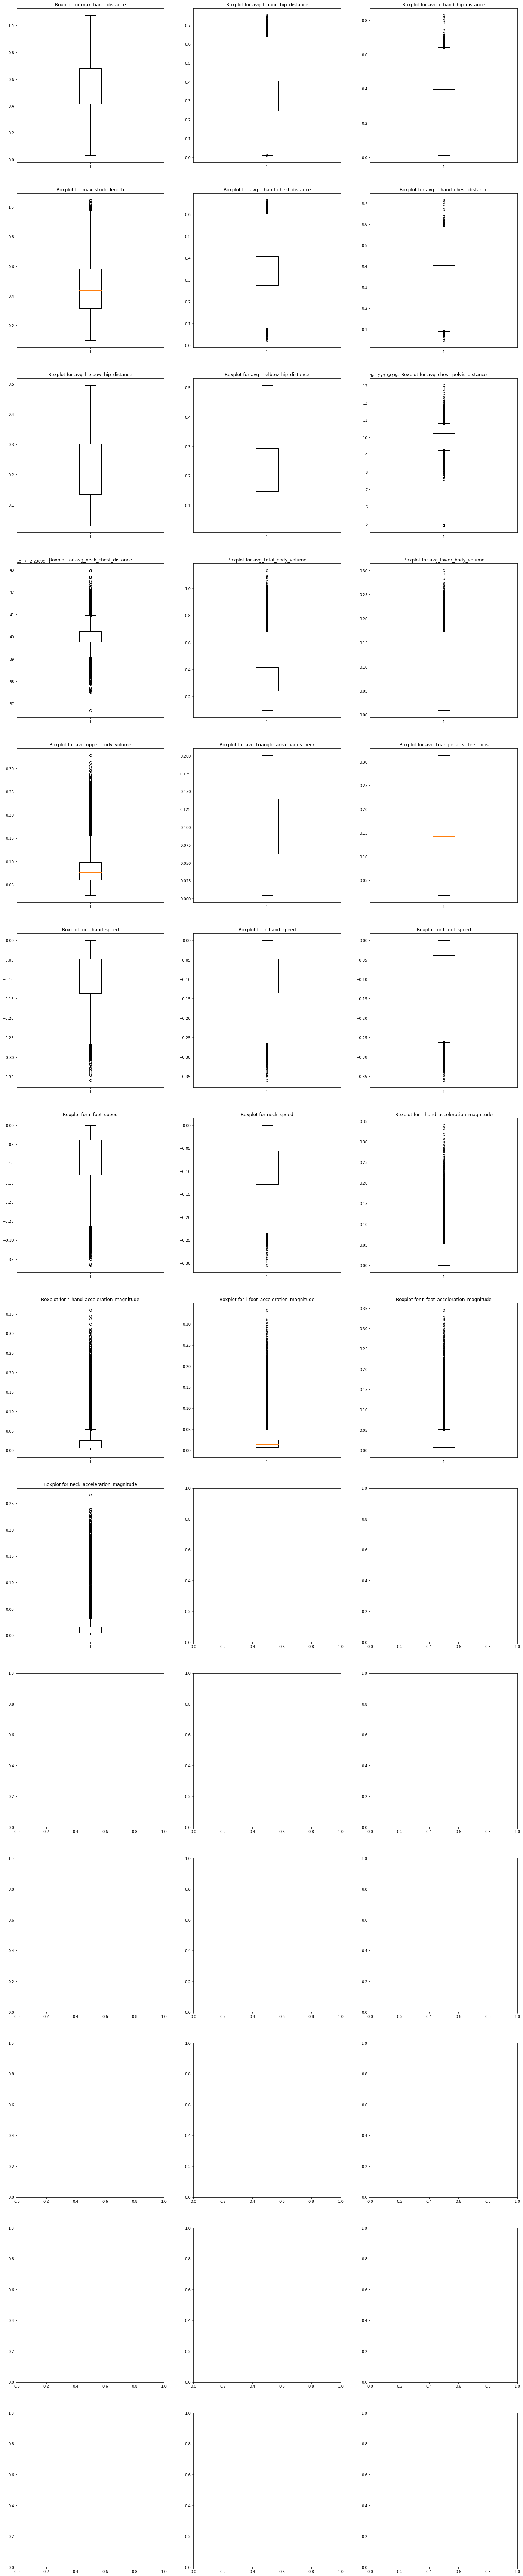

In [83]:
target = pd.concat([data.pop(x) for x in ['EMOTION_P', 'EMOTION_A', 'EMOTION_D']], axis=1)

numeric_vars = data.columns

rows = 14
cols = 3

fig, axs = plt.subplots(rows, cols, figsize=(cols * 8, rows * 9))
i, j = 0, 0

off=0
for n in range(len(numeric_vars)):
    num_unique = len(list(set(data[numeric_vars[n]].values)))
    axs[i, j].set_title('Boxplot for %s'%numeric_vars[n])
    axs[i, j].boxplot(data[numeric_vars[n]].dropna().values)
    
    i, j = (i + 1, 0) if (n+1-off) % cols == 0 else (i, j + 1)
    
plt.show()

In [84]:
numeric_data = data

transf = StandardScaler(copy=True).fit(numeric_data)
minMaxData = pd.DataFrame(transf.transform(numeric_data), columns = numeric_data.columns)
minMaxData.describe(include='all')

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,l_hand_speed,r_hand_speed,l_foot_speed,r_foot_speed,neck_speed,l_hand_acceleration_magnitude,r_hand_acceleration_magnitude,l_foot_acceleration_magnitude,r_foot_acceleration_magnitude,neck_acceleration_magnitude
count,7.855100e+04,7.855100e+04,7.855100e+04,7.855100e+04,7.855100e+04,7.855100e+04,7.855100e+04,7.855100e+04,7.855100e+04,7.855100e+04,...,7.855100e+04,7.855100e+04,7.855100e+04,7.855100e+04,7.855100e+04,7.855100e+04,7.855100e+04,7.855100e+04,7.855100e+04,7.855100e+04
mean,-9.479813e-17,-7.236498e-18,3.111694e-17,-1.201259e-16,-5.977348e-16,2.286734e-16,1.331516e-16,-8.104878e-17,-8.163145e-10,-3.274248e-11,...,7.091768e-17,7.525958e-17,-2.098585e-17,9.769273e-17,-1.078238e-16,8.032513e-17,5.499739e-17,3.582067e-17,4.703724e-18,7.887783e-17
std,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,...,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00,1.000006e+00
min,-2.625329e+00,-2.417090e+00,-2.459826e+00,-2.062015e+00,-3.322516e+00,-3.335056e+00,-2.046093e+00,-2.257567e+00,-1.484224e+01,-8.167994e+00,...,-4.250766e+00,-4.238958e+00,-4.018159e+00,-4.126416e+00,-4.018837e+00,-9.171653e-01,-8.883956e-01,-9.561744e-01,-9.516130e-01,-7.904626e-01
25%,-6.596418e-01,-5.684549e-01,-6.273568e-01,-8.014150e-01,-6.592458e-01,-6.848395e-01,-9.895815e-01,-9.386156e-01,-5.607609e-01,-5.936626e-01,...,-6.653673e-01,-6.511381e-01,-5.407241e-01,-5.609869e-01,-7.299977e-01,-6.220702e-01,-6.203989e-01,-5.798714e-01,-5.789565e-01,-4.956173e-01
50%,2.851773e-02,8.064282e-02,-6.551233e-03,-1.035125e-01,4.212924e-02,5.538155e-02,2.776865e-01,2.344916e-01,-2.116134e-03,-8.447158e-03,...,1.329991e-01,1.476281e-01,1.182457e-01,1.316511e-01,2.087985e-01,-2.431316e-01,-2.484487e-01,-2.505714e-01,-2.379278e-01,-2.350082e-01
75%,7.008401e-01,6.618251e-01,6.966579e-01,7.291235e-01,7.362225e-01,7.485228e-01,7.261402e-01,7.287408e-01,5.597646e-01,5.802900e-01,...,7.522685e-01,7.381064e-01,8.040213e-01,8.029991e-01,6.344002e-01,3.113680e-01,2.891164e-01,3.228517e-01,3.203283e-01,2.487222e-01
max,2.711172e+00,3.351381e+00,4.208904e+00,3.382557e+00,3.431104e+00,4.276888e+00,2.703715e+00,3.160084e+00,8.581712e+00,7.318901e+00,...,1.520407e+00,1.503970e+00,1.378778e+00,1.387948e+00,1.657295e+00,1.539231e+01,1.612559e+01,1.578458e+01,1.658008e+01,1.679060e+01


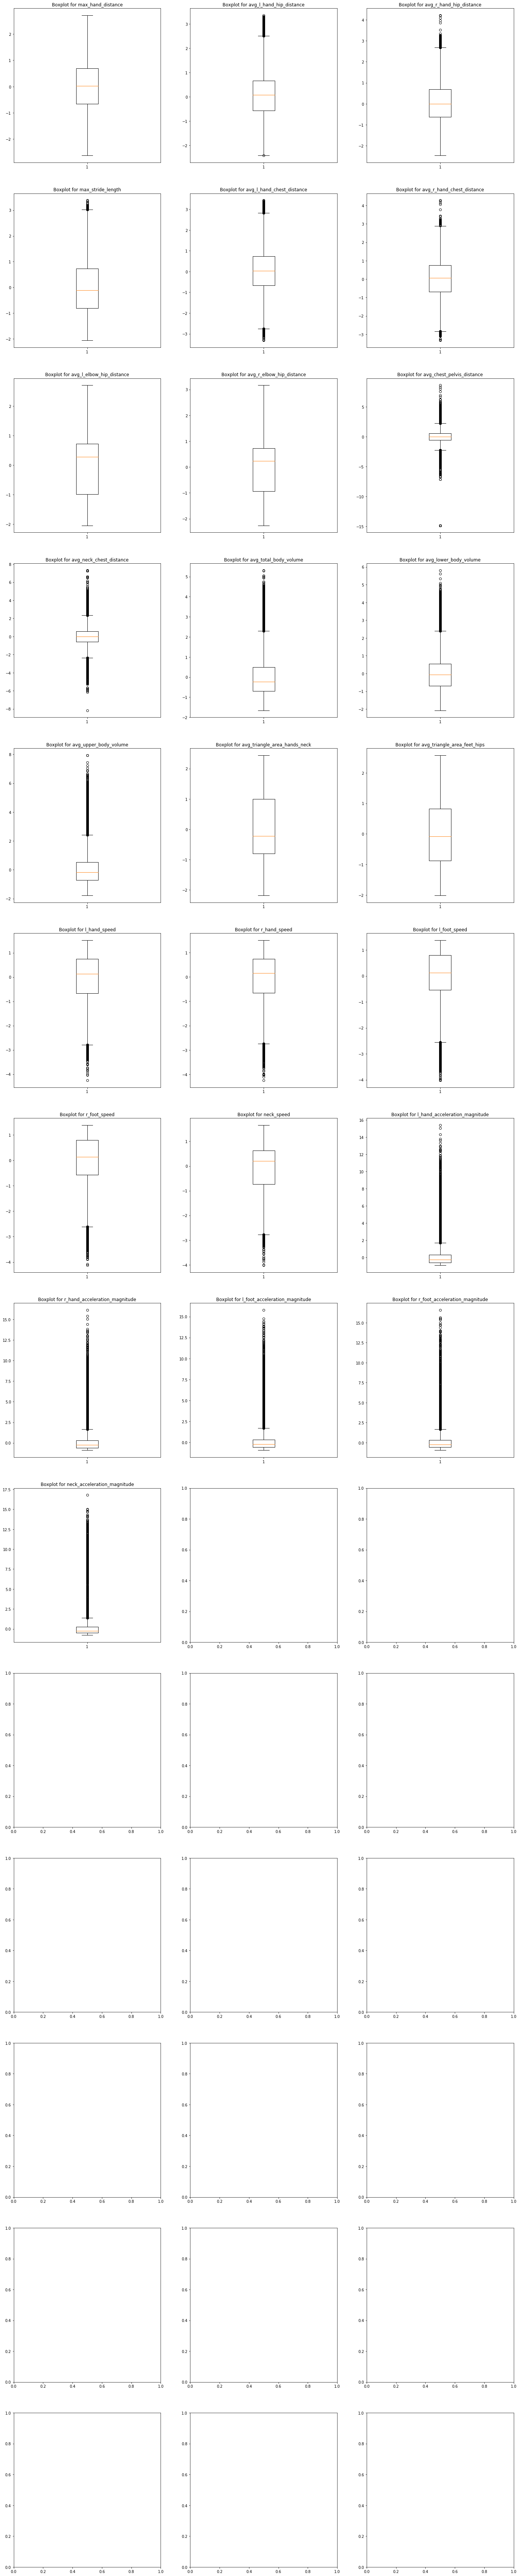

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,l_hand_speed,r_hand_speed,l_foot_speed,r_foot_speed,neck_speed,l_hand_acceleration_magnitude,r_hand_acceleration_magnitude,l_foot_acceleration_magnitude,r_foot_acceleration_magnitude,neck_acceleration_magnitude
0,-0.567722,-1.483635,0.194230,0.467700,-1.615058,-0.314872,-0.206298,-1.541790,0.138717,-1.311304,...,0.029236,-1.624897,-1.930631,-0.684693,-0.937923,3.539279,8.381179,10.162116,6.033898,8.440693
1,-1.004482,-1.365651,-0.446875,-0.010583,-1.472945,-0.610184,-0.598183,-1.417232,-1.481655,2.897200,...,0.737890,-1.131468,-0.925424,0.295860,-0.112038,1.429755,0.662018,2.594410,2.711580,2.195382
2,-1.146203,-0.889596,-1.070616,-0.443944,-1.088673,-0.887638,-1.001575,-1.161459,3.796334,0.205251,...,0.767011,-1.087846,-0.626511,0.799753,-0.081136,0.560904,1.146672,0.460618,0.904558,0.151529
3,-0.737269,-0.258759,-1.422978,-0.791093,-0.616389,-1.121109,-1.210180,-0.826561,-0.650733,-1.296300,...,0.232613,-0.913659,-0.547222,0.832781,-0.231230,1.218691,1.681839,-0.167950,-0.300593,0.632989
4,-0.402676,0.277334,-1.429524,-0.847864,-0.257748,-1.292510,-1.206930,-0.487661,-1.228643,0.548417,...,-0.399452,-0.902645,-0.756670,0.568771,-0.530519,1.225230,0.842286,0.053010,0.166820,0.861649


In [85]:
numeric_vars = minMaxData.select_dtypes(include='number').columns
rows = 14
cols = 3

fig, axs = plt.subplots(rows, cols, figsize=(cols * 8, rows * 9))
i, j = 0, 0

off=0
for n in range(len(numeric_vars)):
    num_unique = len(list(set(minMaxData[numeric_vars[n]].values)))
    #only boxplot non boolean vars
    if num_unique == 2:
        off+=1
    else:
        axs[i, j].set_title('Boxplot for %s'%numeric_vars[n])
        axs[i, j].boxplot(minMaxData[numeric_vars[n]].dropna().values)
        i, j = (i + 1, 0) if (n+1-off) % cols == 0 else (i, j + 1)
plt.show()

minMaxData.head()

In [86]:
#Store MinMaxScaler

minMaxDataFull = minMaxData.join(target, how='right')
minMaxDataFull.to_csv(r'datasets/S_BANDAI_5frame.csv', index = False)

joblib.dump(transf, r'datasets/scalers/standardizers/S_BANDAI_5frame.pkl') 

['datasets/scalers/standardizers/S_BANDAI_5frame.pkl']

In [30]:
data = pd.read_csv('datasets/S_BANDAI_5frame.csv')
scaler = joblib.load(r'datasets/scalers/standardizers/S_BANDAI_5frame.pkl') 

data.head()

,max_hand_distance,avg_l_hand_hip_distance,avg_r_hand_hip_distance,max_stride_length,avg_l_hand_chest_distance,avg_r_hand_chest_distance,avg_l_elbow_hip_distance,avg_r_elbow_hip_distance,avg_chest_pelvis_distance,avg_neck_chest_distance,...,r_foot_speed,neck_speed,l_hand_acceleration_magnitude,r_hand_acceleration_magnitude,l_foot_acceleration_magnitude,r_foot_acceleration_magnitude,neck_acceleration_magnitude,EMOTION_P,EMOTION_A,EMOTION_D
0,-0.567722,-1.483635,0.194230,0.467700,-1.615058,-0.314872,-0.206298,-1.541790,0.138717,-1.311304,...,-0.684693,-0.937923,3.539279,8.381179,10.162116,6.033898,8.440693,0.05,-0.4,0.0
1,-1.004482,-1.365651,-0.446875,-0.010583,-1.472945,-0.610184,-0.598183,-1.417232,-1.481655,2.897200,...,0.295860,-0.112038,1.429755,0.662018,2.594410,2.711580,2.195382,0.05,-0.4,0.0
2,-1.146203,-0.889596,-1.070616,-0.443944,-1.088673,-0.887638,-1.001575,-1.161459,3.796334,0.205251,...,0.799753,-0.081136,0.560904,1.146672,0.460618,0.904558,0.151529,0.05,-0.4,0.0
3,-0.737269,-0.258759,-1.422978,-0.791093,-0.616389,-1.121109,-1.210180,-0.826561,-0.650733,-1.296300,...,0.832781,-0.231230,1.218691,1.681839,-0.167950,-0.300593,0.632989,0.05,-0.4,0.0
4,-0.402676,0.277334,-1.429524,-0.847864,-0.257748,-1.292510,-1.206930,-0.487661,-1.228643,0.548417,...,0.568771,-0.530519,1.225230,0.842286,0.053010,0.166820,0.861649,0.05,-0.4,0.0


In [24]:
print(data.shape)

(78551, 28)
